In [1]:
#Importing libraries

import numpy as np # library to handle data in a vectorized manner
import os
import geopandas
import pandas as pd # library for data analsysis
import random
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import geopandas as gp

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and Seabornand associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins
import shapely
from shapely.geometry import shape,mapping, Point, Polygon, MultiPolygon

from tqdm import tqdm

print('Libraries imported.')

Libraries imported.


# CHAPTER C. CORRELATION BETWEEN TRAFFIC ACCIDENTS AND VENUES IN MEDELLÍN

In [2]:
# Reading venues by neighborhood
venues_per_neigh = pd.read_csv('data/venues_per_neigh.csv')[['NOMBRE', 'Cluster Labels']]
venues_per_neigh.rename(columns={"NOMBRE": "neighborhood"}, inplace=True)
print(venues_per_neigh.shape)
venues_per_neigh.head()

(264, 2)


,neighborhood,Cluster Labels
0,La Aguacatala,0
1,El Pinal,4
2,Las Granjas,0
3,Barrios de Jesús,0
4,La Alpujarra,0


In [3]:
# Reading accidents by neighborhood
accidents_per_neigh = pd.read_csv('data/accidents_per_neigh.csv')
accidents_per_neigh.drop(['Unnamed: 0'], axis=1, inplace=True)
print(accidents_per_neigh.shape)
accidents_per_neigh.head()

(261, 6)


,neighborhood,crash,fallen_occupant,other,overturning,run_over
0,Aguas Frías,9,3,6,1,2
1,Aldea Pablo VI,25,12,6,2,19
2,Alejandro Echavarría,130,23,38,11,38
3,Alejandría,408,18,23,9,14
4,Alfonso López,714,198,201,55,148


In [4]:
# Merging both datasets

accidents_venues = accidents_per_neigh.join(venues_per_neigh.set_index('neighborhood'), on='neighborhood')
accidents_venues.dropna(inplace=True)
accidents_venues['Cluster Labels'] = accidents_venues['Cluster Labels'].astype(int)
print(accidents_venues.shape)
accidents_venues.head()

(220, 7)


,neighborhood,crash,fallen_occupant,other,overturning,run_over,Cluster Labels
1,Aldea Pablo VI,25,12,6,2,19,0
2,Alejandro Echavarría,130,23,38,11,38,0
3,Alejandría,408,18,23,9,14,0
4,Alfonso López,714,198,201,55,148,0
5,Altamira,207,34,40,12,23,0


In [5]:
accidents_venues.isna().sum()

neighborhood       0
crash              0
fallen_occupant    0
other              0
overturning        0
run_over           0
Cluster Labels     0
dtype: int64

#### Next, let's group rows by Cluster Labels and by taking the mean of the frequency of occurrence of each class of accident

In [6]:
neigh_grouped = accidents_venues.groupby('Cluster Labels').mean()
neigh_grouped

,crash,fallen_occupant,other,overturning,run_over
Cluster Labels,,,,,
0,1156.239766,136.953216,165.000000,49.526316,158.076023
1,189.636364,46.181818,50.454545,14.636364,74.181818
2,267.166667,61.666667,56.166667,17.833333,46.166667
3,238.375000,42.750000,51.250000,15.083333,47.458333
4,189.625000,44.750000,53.625000,16.000000,68.375000


In [7]:
# Transforming to percentage for each row
neigh_grouped = neigh_grouped.transpose()
neigh_grouped = neigh_grouped/neigh_grouped.sum()
neigh_grouped = neigh_grouped.transpose()
neigh_grouped = neigh_grouped.reset_index()
neigh_grouped

,Cluster Labels,crash,fallen_occupant,other,overturning,run_over
0,0,0.694107,0.082215,0.099052,0.029731,0.094895
1,1,0.505574,0.123122,0.134513,0.039021,0.197770
2,2,0.595026,0.137342,0.125093,0.039718,0.102821
3,3,0.603608,0.108251,0.129774,0.038194,0.120173
4,4,0.509231,0.120175,0.144008,0.042967,0.183619


#### Now, lets visualize these values and make some conclusions

<Figure size 7200x7200 with 0 Axes>

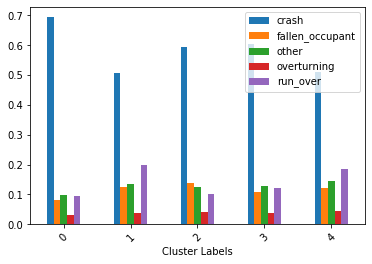

In [20]:
# Analyzing statistical correlations between socioeconomic values and the respective choice
plt.figure(figsize=(100,100))
neigh_grouped.plot(x='Cluster Labels', y=['crash', 'fallen_occupant', 'other', 'overturning', 'run_over'], kind="bar")
plt.legend(loc='best')
plt.xticks(rotation=45)

plt.savefig('Results.png')
    

From the figure above, we can conclude the following:
- Crashes are the most common traffic accidents in every cluster
- Clusters 1 and 4 have more run_overs than fallen_occupants and other kind of traffic accidents (neighborhoods with restaurants, bars, soccer fields and concert halls).
- Cluster 2 has more fallen_occupants and other kind of traffic accidents than run_overs (places with food trucks, gyms, bars and stores).
- Overturning is the least frequent traffic accident in all neighborhoods